In [160]:

import os
import shutil
import time
from collections import defaultdict


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from SALib.analyze import sobol


from ema_workbench import (
    Model, Policy, Scenario, MultiprocessingEvaluator,
    ema_logging
)
from ema_workbench.analysis import (
    feature_scoring, parcoords, pairs_plotting, prim
)
from ema_workbench.em_framework.evaluators import (
    BaseEvaluator, perform_experiments
)
from ema_workbench.em_framework.optimization import (
    ArchiveLogger, EpsilonProgress, EpsNSGAII,
    HyperVolume, epsilon_nondominated, to_problem
)
from ema_workbench.em_framework.outcomes import ScalarOutcome
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench.em_framework.samplers import sample_uncertainties
from pandas.api.types import is_numeric_dtype


from ema_workbench import Constraint
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import dimensional_stacking
from pandas.api.types import is_numeric_dtype, is_categorical_dtype

def get_do_nothing_dict():
    return {l.name: 0 for l in model.levers}


print("goed bezig tess")


goed bezig tess


In [152]:
#Start with running baseline scenario
if __name__ == "__main__":
    model, _ = get_model_for_problem_formulation(3)

    with MultiprocessingEvaluator(model, n_processes=-1) as evaluator:
        baseline = Policy("do_nothing", **get_do_nothing_dict())
        policies = [baseline]

        results = evaluator.perform_experiments(scenarios=10, policies=policies)
        baseline_experiments, baseline_outcomes = results


  1%|‚ñå                                       | 14/1000 [00:14<02:35,  6.34it/s][MainProcess/INFO] pool started with 7 workers

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:02<00:00,  3.98it/s]
[MainProcess/INFO] terminating pool


In [153]:
# Your lever names ‚Äî make sure they exactly match model.levers
rfr_lever_names = [f"{area}_RfR {i}" for area in range(5) for i in range(3)]

# Constraint function
def max_one_rfr_total(*args):
    total = float(np.sum(args))  # ensures scalar
    violation = 0
    for i in range(0, len(args), 3):
        group_total = float(np.sum(args[i:i+3]))
        if group_total > 1:
            violation += group_total - 1
    return violation

# Constraint object
max_one_rfr_constraint = Constraint(
    "max_one_rfr_total",
    function=max_one_rfr_total,
    parameter_names=rfr_lever_names)

## Running and showing the model

In [154]:
if __name__ == "__main__":

    # --- Load your model ---
    model, planning_steps = get_model_for_problem_formulation(3)



    reference_values = {
        "Bmax": 175,
        "Brate": 1.5,
        "pfail": 0.5,
        "discount rate 0": 3.5,
        "discount rate 1": 3.5,
        "discount rate 2": 3.5,
        "ID flood wave shape": 4,
    }
    scen1 = {}

    for key in model.uncertainties:
        name_split = key.name.split("_")

        if len(name_split) == 1:
            scen1.update({key.name: reference_values[key.name]})

        else:
            scen1.update({key.name: reference_values[name_split[1]]})

    ref_scenario = Scenario("reference", **scen1)


    convergence_metrics = [

    EpsilonProgress(),
]

    espilon = [0.01] * len(model.outcomes)


    nfe = 1000

    with MultiprocessingEvaluator(model) as evaluator:
        results, convergence = evaluator.optimize(
            nfe=nfe,
            searchover="levers",
            epsilons=espilon,
            convergence=convergence_metrics,constraints=[max_one_rfr_constraint], reference=ref_scenario,

        )

[MainProcess/INFO] pool started with 8 workers

  0%|                                                 | 0/1000 [00:00<?, ?it/s]INFO | EpsNSGAII starting

 40%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                       | 400/1000 [01:02<01:37,  6.17it/s]INFO | EpsNSGAII running; NFE Complete: 500, Elapsed Time: 0:01:18.928410

 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 900/1000 [02:26<00:16,  5.89it/s]INFO | EpsNSGAII running; NFE Complete: 1000, Elapsed Time: 0:02:43.271281
INFO | EpsNSGAII finished; Total NFE: 1000, Elapsed Time: 0:02:43.272004

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [02:43<00:00,  6.12it/s]
[MainProcess/INFO] optimization completed, found 20 solutions
[MainProcess/INFO] terminating pool


In [155]:
results

0_RfR 0  0_RfR 1  0_RfR 2  1_RfR 0  1_RfR 1  1_RfR 2  2_RfR 0  2_RfR 1  \
0         0        1        0        0        0        0        0        0   
1         0        0        0        0        0        0        1        0   
2         0        0        0        0        0        0        0        0   
3         0        1        0        0        0        0        1        0   
4         0        0        0        0        0        0        1        0   
5         0        0        0        1        0        0        0        0   
6         0        0        0        0        0        0        1        0   
7         1        0        0        0        0        0        0        1   
8         0        0        0        0        0        0        0        0   
9         0        0        0        0        0        0        0        0   
10        0        0        0        0        0        0        0        0   
11        1        0        0        0        0        0        0        1   
12        0        1        0        0        0        0        1        0   
13        0        0        0        0        0        0        0        0   
14        0        0        0        0        0        0        0        0   
15        1        0        0        0        0        0        0        0   
16        0        0        0        1        0        0        0        1   
17        0        0        1        0        0        0        1        0   
18        1        0        0        0        1        0        0        0   
19        0        1        0        0        0        0        1        0   

    2_RfR 2  3_RfR 0  ...  A.4_DikeIncrease 1  A.4_DikeIncrease 2  \
0         1        1  ...                   5                   5   
1         0        0  ...                   6                   4   
2         0        0  ...                   6                   2   
3         0        0  ...                   6                   6   
4         0        0  ...                   6                   4   
5         1        0  ...                   2                   5   
6         0        0  ...                   6                   6   
7         0        0  ...                   4                   0   
8         0        0  ...                   6                   0   
9         0        0  ...                   0                   2   
10        0        0  ...                   6                   5   
11        0        0  ...                   0                   0   
12        0        0  ...                   5                   5   
13        0        0  ...                   0                   6   
14        1        0  ...                   6                   9   
15        1        0  ...                  10                   5   
16        0        0  ...                   4                   6   
17        0        0  ...                   6                   5   
18        1        0  ...                   3                   3   
19        0        0  ...                   2                   0   

    A.5_DikeIncrease 0  A.5_DikeIncrease 1  A.5_DikeIncrease 2  \
0                    5                   4                   5   
1                    5                   5                   7   
2                    6                   5                   5   
3                    6                   5                   1   
4                    6                   2                   2   
5                    2                   4                   1   
6                    4                   1                   4   
7                    2                   5                   1   
8                    7                   1                  10   
9                    5                   6                   2   
10                   7                   4                   5   
11                   5                   6                   1   
12                   9                  10               

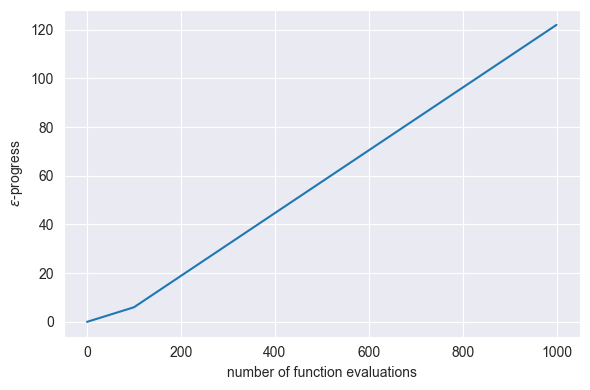

In [156]:
fig, ax1 = plt.subplots(figsize=(6, 4))  # no ncols=2

ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel(r'$\epsilon$-progress')
ax1.set_xlabel('number of function evaluations')
plt.savefig("convergence enkel MORDM.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()



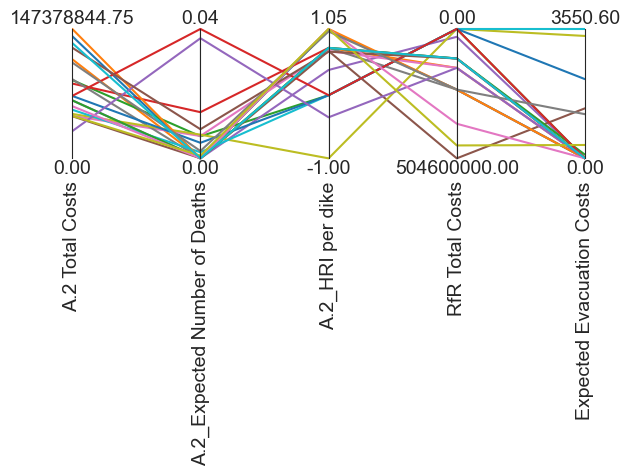

<Figure size 1400x1000 with 0 Axes>

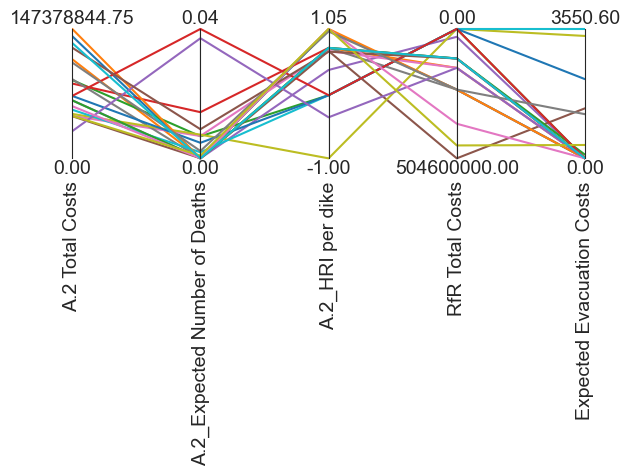

In [157]:
data = results.loc[:, [o.name for o in model.outcomes]]
limits = parcoords.get_limits(data)
limits.loc[0, ['A.2 Total Costs', 'A.2_Expected Number of Deaths', 'RfR Total Costs',"Expected Evacuation Costs"]] = 0

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
paraxes.invert_axis("RfR Total Costs")
    # Set larger figure size (wider and taller)
plt.figure(figsize=(14, 10))  # width=12 inches, height=8 inches

# Generate parallel axes with your limits
paraxes = parcoords.ParallelAxes(limits)

# Plot the data
paraxes.plot(data)

# Invert specific axis
paraxes.invert_axis("RfR Total Costs")

# Save the plot
plt.savefig("mordm_parallel coordinates all.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [158]:
logical = (
    (results["A.2 Total Costs"] < 7e7) &

    (results["A.2_HRI per dike"] > 0.7))



np.sum(logical)

np.int64(3)

/var/folders/sp/3r57ckwj0f59wpwykds8r5040000gn/T/ipykernel_28432/959764074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_1["policy"] = results_1.index  # Automatically uses 16, 17, 18 in your case


<Figure size 1400x1000 with 0 Axes>

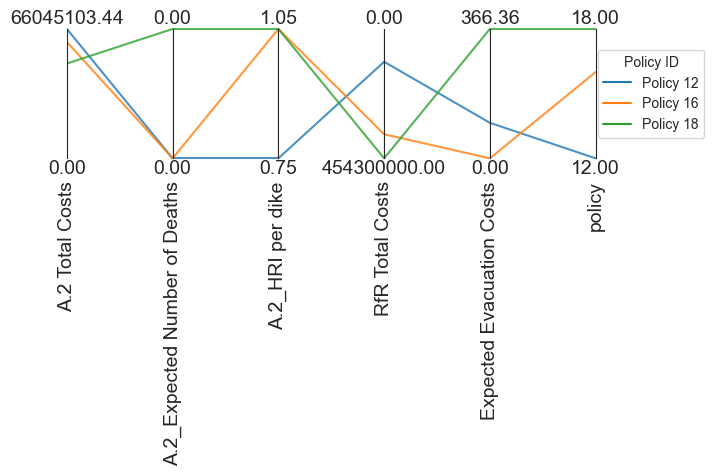

In [159]:
results_1 = results[logical]
results_1["policy"] = results_1.index  # Automatically uses 16, 17, 18 in your case


data = results_1.loc[:, [o.name for o in model.outcomes] + ['policy']]


limits = parcoords.get_limits(data)
limits.loc[0, ['A.2 Total Costs', 'A.2_Expected Number of Deaths',
               'RfR Total Costs', 'Expected Evacuation Costs']] = 0


policy_ids = data["policy"].unique()
colors = sns.color_palette("tab10", len(policy_ids))
color_map = dict(zip(policy_ids, colors))


plt.figure(figsize=(14, 10))
paraxes = parcoords.ParallelAxes(limits)

# Plot each policy row with its assigned color
for _, row in data.iterrows():
    policy_id = row["policy"]
    color = color_map.get(policy_id, "gray")
    paraxes.plot(row.to_frame().T, color=color, alpha=0.8)

# Invert axis if needed
paraxes.invert_axis("RfR Total Costs")

from matplotlib.lines import Line2D
legend_handles = [
    Line2D([0], [0], color=color_map[pid], label=f"Policy {pid}")
    for pid in policy_ids
]
plt.legend(handles=legend_handles, title="Policy ID", loc="center left",bbox_to_anchor=(1.02, 0.5),borderaxespad=0)


plt.savefig("parallel_coords_MORDM_selected_policies.png", dpi=300, bbox_inches='tight')
plt.show()

## optimized policies

In [71]:
policies = results[logical]
policies = policies.drop([o.name for o in model.outcomes], axis=1)
policies

0_RfR 0  0_RfR 1  0_RfR 2  1_RfR 0  1_RfR 1  1_RfR 2  2_RfR 0  2_RfR 1  \
24        0        0        0        0        0        0        1        0   
42        1        0        0        0        0        0        0        0   
53        1        0        0        0        0        0        0        0   

    2_RfR 2  3_RfR 0  ...  A.2_DikeIncrease 2  A.3_DikeIncrease 0  \
24        0        0  ...                   0                   5   
42        1        0  ...                   0                   5   
53        0        0  ...                   0                   3   

    A.3_DikeIncrease 1  A.3_DikeIncrease 2  A.4_DikeIncrease 0  \
24                   5                   4                   5   
42                   3                   4                   7   
53                   5                   1                   2   

    A.4_DikeIncrease 1  A.4_DikeIncrease 2  A.5_DikeIncrease 0  \
24                   7                   3                   9   
42                   7                   0                   9   
53                   6                   2                   6   

    A.5_DikeIncrease 1  A.5_DikeIncrease 2  
24                   5                   5  
42                   6                   8  
53                   3                   6  

[3 rows x 31 columns]

In [72]:
policies_to_evaluate = []

for i, policy in policies.iterrows():
    policies_to_evaluate.append(Policy(str(i), **policy.to_dict()))

In [73]:
#Create policy dataframe
lever_names = [l.name for l in model.levers]
#policies_df = results[lever_names]
policies.to_csv("candidate_policies.csv", index=False)

## Testing out the policies

In [75]:
n_scenarios = 20
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies_to_evaluate)

[MainProcess/INFO] pool started with 8 workers

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 60/60 [00:07<00:00,  8.17it/s]
[MainProcess/INFO] terminating pool


In [76]:
def s_to_n(data, direction):
    mean = np.mean(data)
    std = np.std(data)
    if std==0:
        std = 1

    if direction==ScalarOutcome.MAXIMIZE:
        return mean/std
    else:
        return mean*std


In [77]:
experiments, outcomes = results

overall_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}

    logical = experiments['policy']==policy

    for outcome in model.outcomes:
        value  = outcomes[outcome.name][logical]
        sn_ratio = s_to_n(value, outcome.kind)
        scores[outcome.name] = sn_ratio
    overall_scores[policy] = scores
scores = pd.DataFrame.from_dict(overall_scores).T
scores

A.2 Total Costs  A.2_Expected Number of Deaths  A.2_HRI per dike  \
24     1.021756e+16                       0.000526          1.680336   
42     3.201649e+16                       0.003266          1.100000   
53     3.382566e+15                       0.000080          3.211820   

    RfR Total Costs  Expected Evacuation Costs  
24      408000000.0               5.509107e+06  
42      492600000.0               3.094217e+07  
53      205800000.0               6.999354e+06

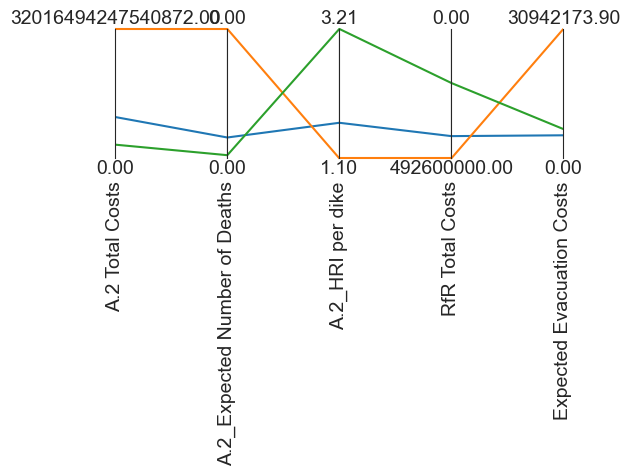

<Figure size 1400x1000 with 0 Axes>

In [78]:
data = scores
limits = parcoords.get_limits(data)
limits.loc[0, ['A.2 Total Costs', 'A.2_Expected Number of Deaths', 'RfR Total Costs',"Expected Evacuation Costs"]] = 0


paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
paraxes.invert_axis("RfR Total Costs")
plt.figure(figsize=(14, 10))
plt.savefig("scores_single_MORDM.png", dpi=300, bbox_inches='tight') # width=12 inches, height=8 inches
plt.show()

In [79]:
def calculate_regret(data, best):
    return np.abs(best-data)

In [80]:
experiments, outcomes = results

overall_regret = {}
max_regret = {}
for outcome in model.outcomes:
    policy_column = experiments['policy']

    # create a DataFrame with all the relevent information
    # i.e., policy, scenario_id, and scores
    data = pd.DataFrame({outcome.name: outcomes[outcome.name],
                         "policy":experiments['policy'],
                         "scenario":experiments['scenario']})

    # reorient the data by indexing with policy and scenario id
    data = data.pivot(index='scenario', columns='policy')

    # flatten the resulting hierarchical index resulting from
    # pivoting, (might be a nicer solution possible)
    data.columns = data.columns.get_level_values(1)

    # we need to control the broadcasting.
    # max returns a 1d vector across scenario id. By passing
    # np.newaxis we ensure that the shape is the same as the data
    # next we take the absolute value
    #
    # basically we take the difference of the maximum across
    # the row and the actual values in the row
    #
    outcome_regret = (data.max(axis=1).values[:, np.newaxis] - data).abs()

    overall_regret[outcome.name] = outcome_regret
    max_regret[outcome.name] = outcome_regret.max()

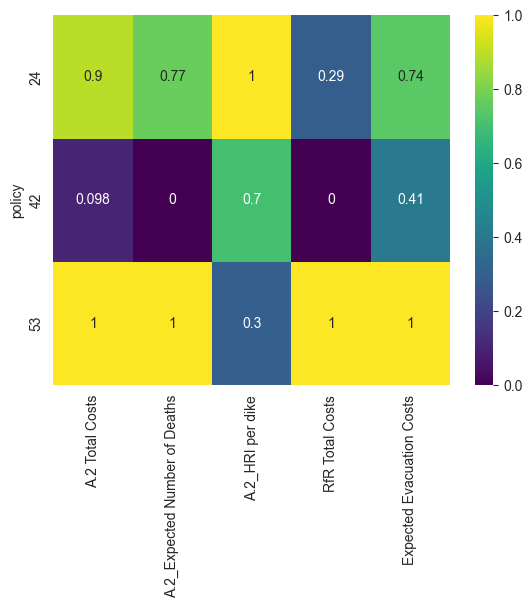

In [81]:
max_regret = pd.DataFrame(max_regret)
sns.heatmap(max_regret/max_regret.max(), cmap='viridis', annot=True)
plt.savefig("regret_single_MORDM.png", dpi=300, bbox_inches='tight')
plt.show()

In [82]:

policy_regret = defaultdict(dict)
for key, value in overall_regret.items():
    for policy in value:
        policy_regret[policy][key] = value[policy]

  0%|                                                | 0/15000 [06:38<?, ?it/s]


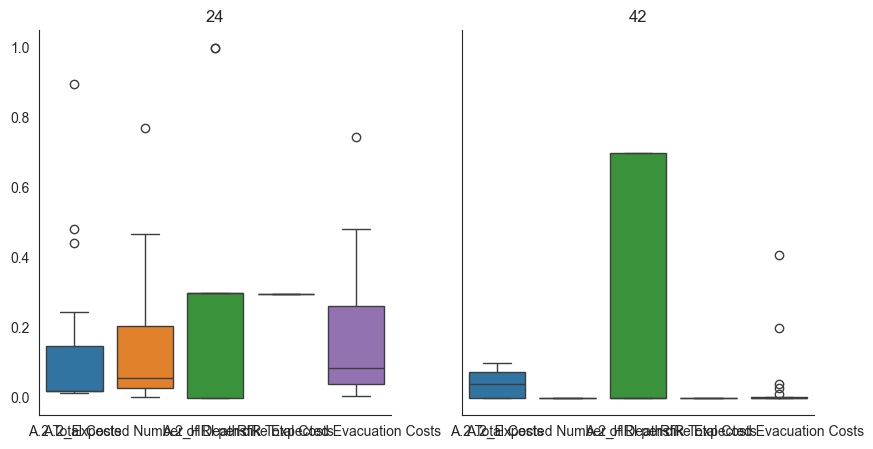

In [83]:
# this generates a 2 plots with a shared y and x axis
fig, axes = plt.subplots(ncols=2, figsize=(10,5),
                         sharey=True, sharex=True)

# to ensure easy iteration over the axes grid, we turn it
# into a list. Because there are four plots, I hard coded
# this.


# zip allows us to zip together the list of axes and the list of
# key value pairs return by items. If we iterate over this
# it returns a tuple of length 2. The first item is the ax
# the second items is the key value pair.
for ax, (policy, regret) in zip(axes, policy_regret.items()):
    data = pd.DataFrame(regret)

    # we need to scale the regret to ensure fair visual
    # comparison. We can do that by divding by the maximum regret
    data = data/max_regret.max(axis=0)
    sns.boxplot(data=data, ax=ax)

    # removes top and left hand black outline of axes
    sns.despine()

    # ensure we know which policy the figure is for
    ax.set_title(str(policy))
plt.show()

## Selecteren scenarios maar gaan we doen met PRIM

In [84]:
policies_df = pd.read_csv("candidate_policies.csv")

# zet elke rij om in een Policy-object
candidate_policies = [
    Policy(f"cand_{i}", **row.to_dict())
    for i, row in policies_df.iterrows()

    ]

In [85]:
if __name__ == "__main__":
    model, _ = get_model_for_problem_formulation(3)
    scenarios=10
    #policies=4
    with MultiprocessingEvaluator(model, n_processes=-1) as evaluator:
        results = evaluator.perform_experiments(scenarios=scenarios, policies=candidate_policies )

        experiments, outcomes = results

[MainProcess/INFO] pool started with 7 workers
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30/30 [00:03<00:00,  9.03it/s]
[MainProcess/INFO] terminating pool


In [86]:
hri_sys = outcomes["A.2_HRI per dike"]
hri_q25 = np.percentile(hri_sys, 25)# (N,) systeembreed
target_hri = hri_sys <= hri_q25

        # ---- 2.2 Expected Annual Damage ----
ead_total = outcomes["A.2 Total Costs"] # (N,)
ead_q75 = np.percentile(ead_total, 75)
target_ead = ead_total >= ead_q75

        # # ---- 2.3 RfR Total Costs ----
        # rfr_costs = outcomes["RfR Total Costs"].sum(axis=1)  # (N,)
        # rfr_q75 = np.percentile(rfr_costs, 75)
        # target_rfr = rfr_costs >= rfr_q75

        # ---- 2.4 Combineer tot √©√©n worst-case target ----
y = target_hri | target_ead        # booleaanse vector (N,)


# hri_baseline=baseline_outcomes["A.2_HRI per dike"]
# hri_sys = outcomes["A.2_HRI per dike"]
# hri_q25 = np.percentile(hri_baseline, 25)# (N,) systeembreed
# target_hri = hri_sys <= hri_q25
#
#         # ---- 2.2 Expected Annual Damage ----
# cost_baseline=baseline_outcomes["A.2 Total Costs"]
# cost_total = outcomes["A.2 Total Costs"] # (N,)
# cost_q75 = np.percentile(cost_baseline, 75)
# target_cost = cost_total >= cost_q75

        # # ---- 2.3 RfR Total Costs ----
        # rfr_costs = outcomes["RfR Total Costs"].sum(axis=1)  # (N,)
        # rfr_q75 = np.percentile(rfr_costs, 75)
        # target_rfr = rfr_costs >= rfr_q75

#         # ---- 2.4 Combineer tot √©√©n worst-case target ----
# y = target_hri | target_cost
# y

print(f"worst-cases: {y.sum()} van {n_scenarios*policies} runs  ({y.mean()*100:.1f} %)")

        # Determine model uncertainties
cols_unc = [u.name for u in model.uncertainties]
X = experiments[cols_unc]

#Start PRIM
prim_alg = prim.Prim(
            X, y,
            threshold=0.80,
        )

print("Aantal opgeslagen boxen:", len(prim_alg.boxes))

worst-cases: 12 van     0_RfR 0  0_RfR 1  0_RfR 2  1_RfR 0  1_RfR 1  1_RfR 2  2_RfR 0  2_RfR 1  \
24        0        0        0        0        0        0       20        0   
42       20        0        0        0        0        0        0        0   
53       20        0        0        0        0        0        0        0   

    2_RfR 2  3_RfR 0  ...  A.2_DikeIncrease 2  A.3_DikeIncrease 0  \
24        0        0  ...                   0                 100   
42       20        0  ...                   0                 100   
53        0        0  ...                   0                  60   

    A.3_DikeIncrease 1  A.3_DikeIncrease 2  A.4_DikeIncrease 0  \
24                 100                  80                 100   
42                  60                  80                 140   
53                 100                  20                  40   

    A.4_DikeIncrease 1  A.4_DikeIncrease 2  A.5_DikeIncrease 0  \
24                 140                  60                 

[MainProcess/INFO] 30 points remaining, containing 12 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.2, coverage: 0.5, density: 1.0 restricted_dimensions: 4


coverage    0.5
density     1.0
id          5.0
k           6.0
mass        0.2
mean        1.0
n           6.0
res_dim     4.0
Name: 5, dtype: float64

                           box 5                                     
                             min              max  qp value  qp value
A.1_Bmax               34.766357       317.476255       NaN  0.087791
discount rate 1       {1.5, 3.5}       {1.5, 3.5}  0.087791       NaN
discount rate 2  {1.5, 3.5, 4.5}  {1.5, 3.5, 4.5}  1.000000       NaN
A.2_Bmax              159.023933       329.287778  1.000000       NaN



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{1.5, 3.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{1.5, 3.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]


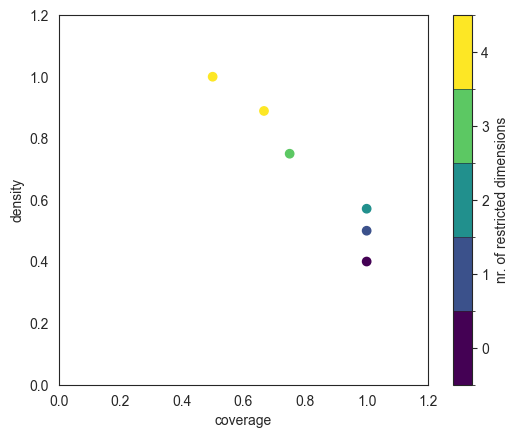

6 stappen in deze box


In [87]:
# A) De ‚Äúbeste‚Äù box volgens je threshold
box = prim_alg.find_box()
box.inspect()
box.show_tradeoff()
plt.show()# geeft een PrimBox terug
traj = box.peeling_trajectory
print(len(traj), "stappen in deze box")

[<Figure size 640x480 with 1 Axes>]

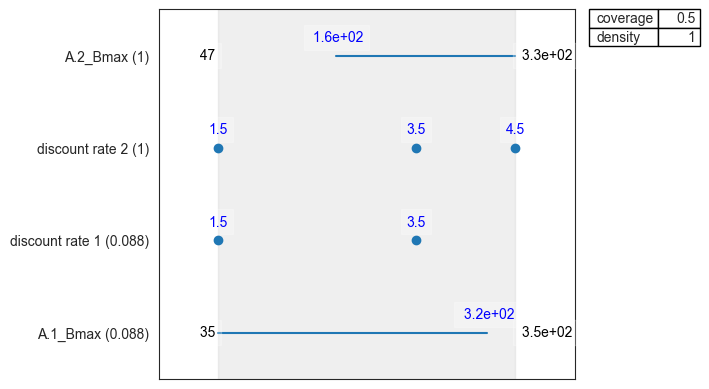

In [88]:
# en inspecteer 'm meteen
box.inspect( style="graph" )

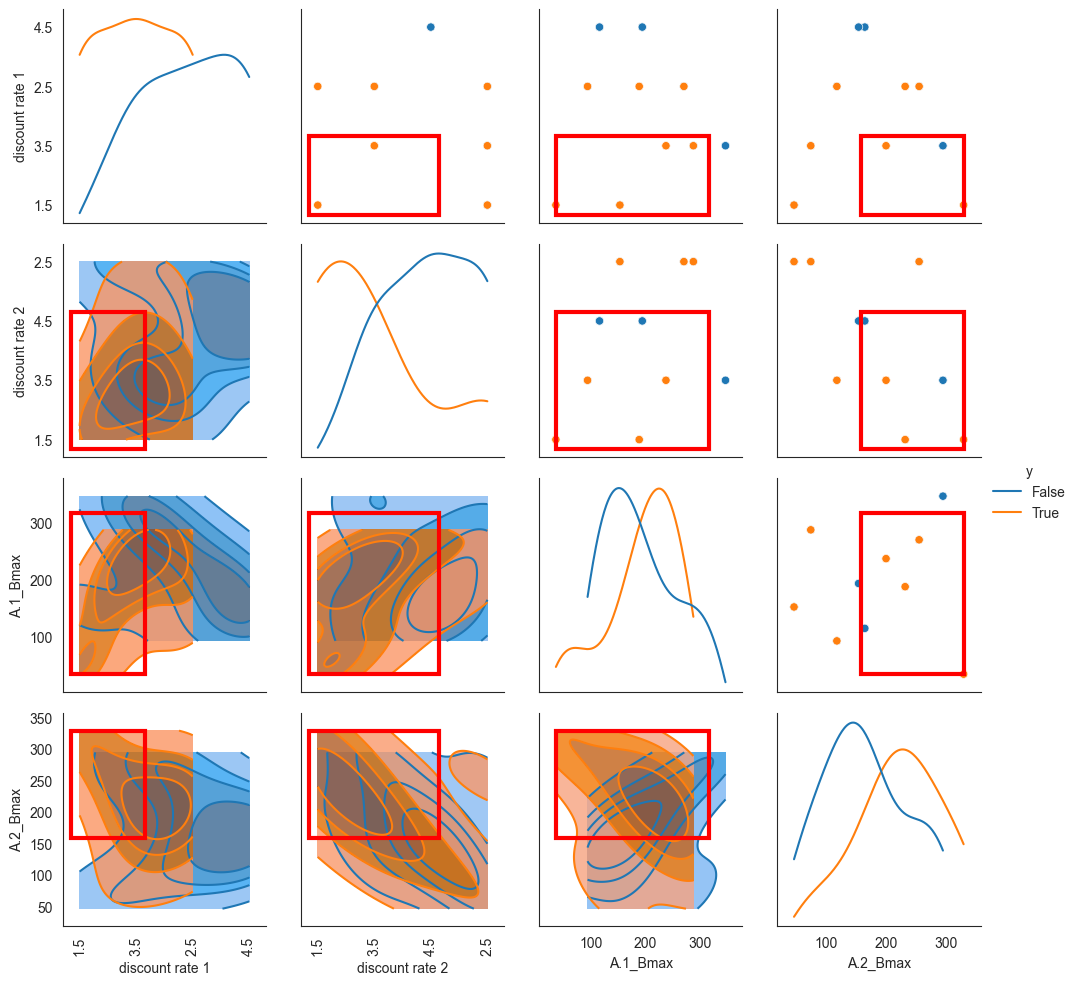

In [89]:
fig = box.show_pairs_scatter()
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category


origineel aantal kolommen: 53
zonder levers           : 22


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ema_workbench/analysis/dimensional_stacking.py:408: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(x_y_concat, values=ooi_label, index=rows, columns=columns, dropna=False)


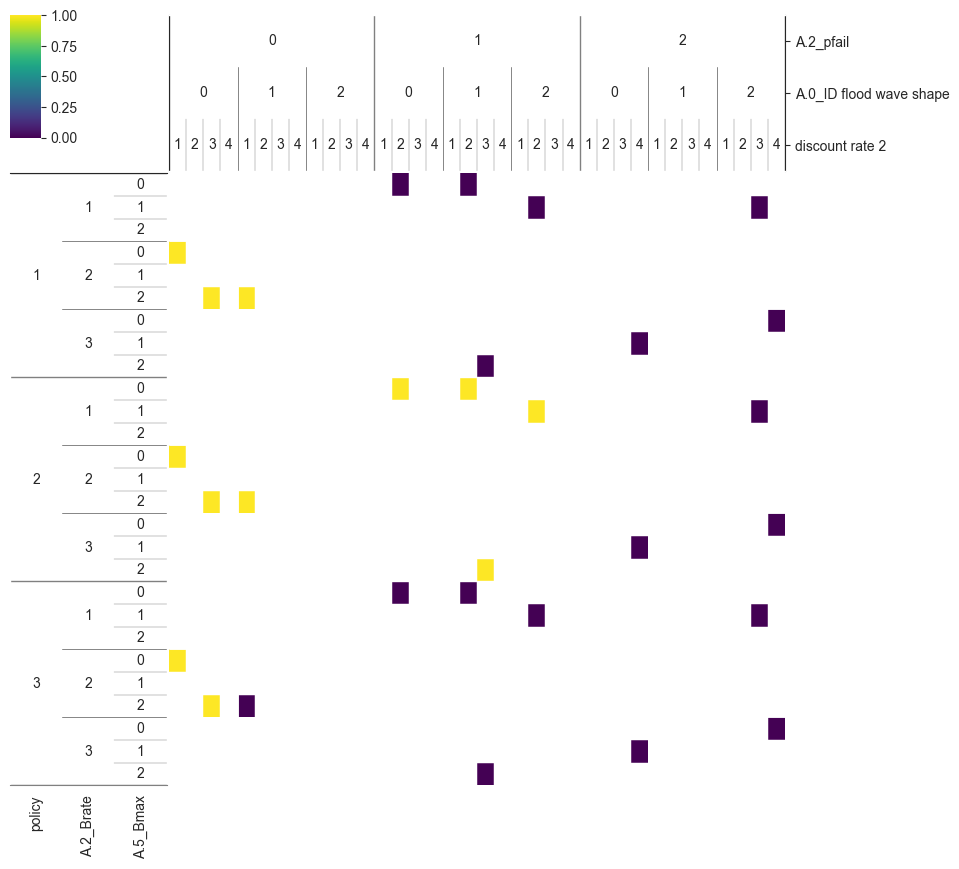

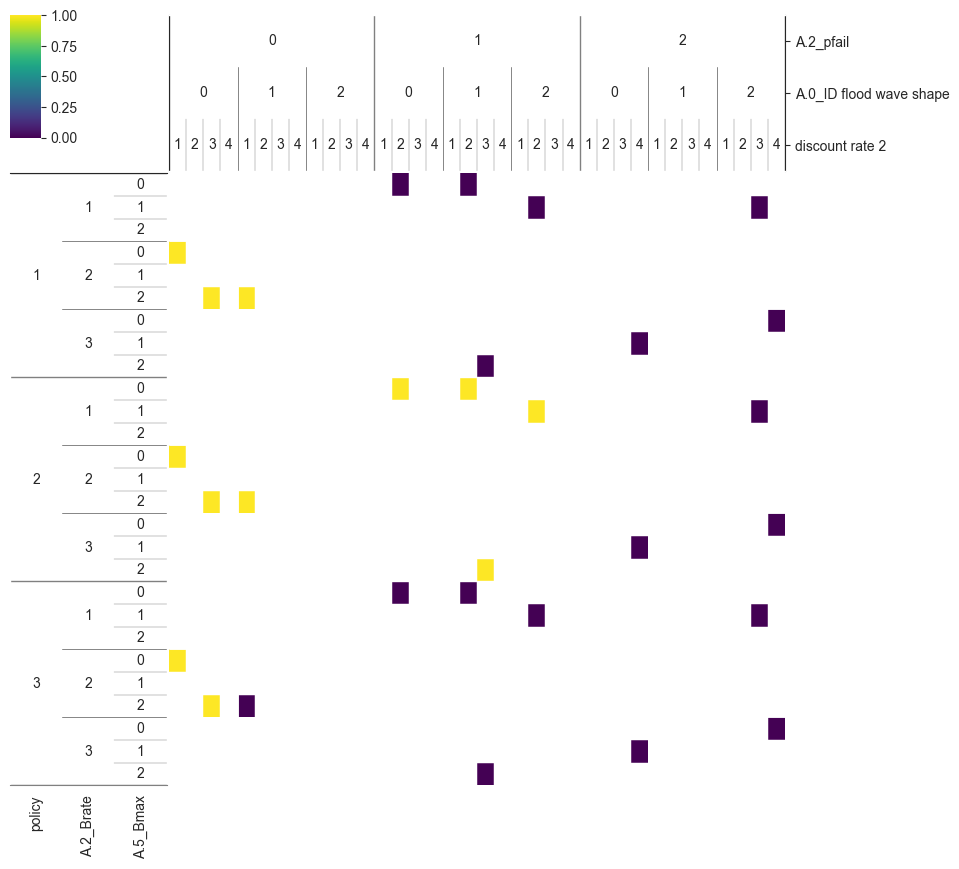

In [90]:
lever_names = [lev.name for lev in model.levers]
experiments_unc = experiments.drop(columns=lever_names)


# even checken:
print("origineel aantal kolommen:", experiments.shape[1])
print("zonder levers           :", experiments_unc.shape[1])

dimensional_stacking.create_pivot_plot(experiments_unc, y)


In [91]:

# 1) Haal de grenzen op uit de box (list met √©√©n entry per box in je peeling_trajectory)
raw_limits = box.box_lims[0]

# 1) Transponeren, zodat elke var een rij wordt, en de kolommen 0 en 1 zijn
df_lim = raw_limits.T

# 2) Hernoemen van de kolommen 0‚Üímin en 1‚Üímax
df_lim = df_lim.rename(columns={0: "min", 1: "max"})

# 3) (optioneel) zet de index-naam netjes
df_lim.index.name = "var"

In [92]:
df_lim
mask = pd.Series(True, index=experiments.index)

for var, row in df_lim.iterrows():
    lo, hi = row["min"], row["max"]
    ser = experiments[var]

    if is_numeric_dtype(ser):
        # voor numerieke parameters
        mask &= ser.between(lo, hi)
    else:
        # voor categorische parameters
        # lo kan een set/list zijn, of een enkele waarde
        if isinstance(lo, (set, list)):
            mask &= ser.isin(lo)
        else:
            mask &= (ser == lo)

exp_in_box = experiments[mask]
out_in_box = {
    name: array[mask.values]  # .values is een numpy‚Äêboolean array
    for name, array in outcomes.items()
}

In [93]:
expanded = {}
for name, arr in out_in_box.items():
    if arr.ndim == 1:
        # gewoon een vector
        expanded[name] = arr
    else:
        # maak per tijdstap een kolom
        T = arr.shape[1]
        for t in range(T):
            expanded[f"{name}_{t}"] = arr[:, t]

out_df = pd.DataFrame(expanded)

In [94]:
exp_in_box['worst_case']=y[exp_in_box.index]
true_worst= exp_in_box[exp_in_box['worst_case']]
#
# true_worst = true_worst.assign(
#     total_cost = out_in_box['A.2 Total Costs']
# )

In [95]:
# --- 1) Maak √©√©n Series van alle total costs, met de originele index ---
all_costs = pd.Series(
    out_in_box['A.2 Total Costs'],       # numpy array voor _alle_ runs in out_in_box
    index = exp_in_box.index              # die hoort dezelfde lengte en index labels te hebben
)

# --- 2) Filter die Series naar alleen de worst‚Äêcase subset (true_worst.index) ---
worst_costs = all_costs.loc[true_worst.index]

# --- 3) Wijs die gefilterde Series toe als nieuwe kolom ---
true_worst = true_worst.assign(total_costs=worst_costs)

In [96]:
true_worst['total_costs'] = pd.Series(
    out_in_box['A.2 Total Costs'],
    index=exp_in_box.index
).loc[true_worst.index]

In [97]:
true_worst

A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
5                        79  188.189436       1.0   0.377464  231.821807   
7                        36  237.439820       1.5   0.630914  199.999421   
9                         6   34.766357       1.0   0.802037  329.287778   
10                       85   93.080915       1.5   0.474064  118.048446   
12                      128  287.905513      10.0   0.598561   74.575080   
14                       44  270.447947      10.0   0.068644  255.132767   
15                       79  188.189436       1.0   0.377464  231.821807   
17                       36  237.439820       1.5   0.630914  199.999421   
18                       62  152.626405       1.0   0.920071   46.624341   
19                        6   34.766357       1.0   0.802037  329.287778   
27                       36  237.439820       1.5   0.630914  199.999421   
29                        6   34.766357       1.0   0.802037  329.287778   

   A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...  \
5        1.5   0.221926  116.506386       1.0   0.829152  ...   
7        1.5   0.088606  325.584151      10.0   0.435362  ...   
9        1.5   0.164332  275.444837       1.0   0.579336  ...   
10      10.0   0.521261   47.846873       1.5   0.793195  ...   
12       1.0   0.633413  310.729903       1.0   0.113425  ...   
14       1.0   0.387738  179.600171       1.5   0.214632  ...   
15       1.5   0.221926  116.506386       1.0   0.829152  ...   
17       1.5   0.088606  325.584151      10.0   0.435362  ...   
18       1.0   0.495092   76.523420       1.5   0.071290  ...   
19       1.5   0.164332  275.444837       1.0   0.579336  ...   
27       1.5   0.088606  325.584151      10.0   0.435362  ...   
29       1.5   0.164332  275.444837       1.0   0.579336  ...   

    A.4_DikeIncrease 1 A.4_DikeIncrease 2  A.5_DikeIncrease 0  \
5                    7                  3                   9   
7                    7                  3                   9   
9                    7                  3                   9   
10                   7                  0                   9   
12                   7                  0                   9   
14                   7                  0                   9   
15                   7                  0                   9   
17                   7                  0                   9   
18                   7                  0                   9   
19                   7                  0                   9   
27                   6                  2                   6   
29                   6                  2                   6   

    A.5_DikeIncrease 1 A.5_DikeIncrease 2  scenario  policy     model  \
5                    5                  5      3025  cand_0  dikesnet   
7                    5                  5      3027  cand_0  dikesnet   
9                    5                  5      3029  cand_0  dikesnet   
10                   6                  8      3020  cand_1  dikesnet   
12                   6                  8      3022  cand_1  dikesnet   
14                   6                  8      3024  cand_1  dikesnet   
15                   6                  8      3025  cand_1  dikesnet   
17                   6                  8      3027  cand_1  dikesnet   
18                   6                  8      3028  cand_1  dikesnet   
19                   6                  8      3029  cand_1  dikesnet   
27                   3                  6      3027  cand_2  dikesnet   
29                   3                  6      3029  cand_2  dikesnet   

   worst_case   total_costs  
5        True  6.407927e+07  
7        True  1.039571e+08  
9        True  9.915107e+07  
10       True  3.222458e+07  
12       True  3.703747e+07  
14       True  4.737923e+07  
15       True  1.913598e+08  
17       True  3.734945e+08  
18       True  3.921913e+07  
19       True  3.565480e+08  
27       True  7.519630e+07  
29       True

In [98]:
# --- 1) Maak √©√©n Series van alle total costs, met de originele index ---
all_costs = pd.Series(
    out_in_box['A.2_HRI per dike'],       # numpy array voor _alle_ runs in out_in_box
    index = exp_in_box.index              # die hoort dezelfde lengte en index labels te hebben
)

# --- 2) Filter die Series naar alleen de worst‚Äêcase subset (true_worst.index) ---
worst_HRI = all_costs.loc[true_worst.index]

# --- 3) Wijs die gefilterde Series toe als nieuwe kolom ---
true_worst = true_worst.assign(HRI=worst_HRI)

In [99]:
true_worst

A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
5                        79  188.189436       1.0   0.377464  231.821807   
7                        36  237.439820       1.5   0.630914  199.999421   
9                         6   34.766357       1.0   0.802037  329.287778   
10                       85   93.080915       1.5   0.474064  118.048446   
12                      128  287.905513      10.0   0.598561   74.575080   
14                       44  270.447947      10.0   0.068644  255.132767   
15                       79  188.189436       1.0   0.377464  231.821807   
17                       36  237.439820       1.5   0.630914  199.999421   
18                       62  152.626405       1.0   0.920071   46.624341   
19                        6   34.766357       1.0   0.802037  329.287778   
27                       36  237.439820       1.5   0.630914  199.999421   
29                        6   34.766357       1.0   0.802037  329.287778   

   A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...  \
5        1.5   0.221926  116.506386       1.0   0.829152  ...   
7        1.5   0.088606  325.584151      10.0   0.435362  ...   
9        1.5   0.164332  275.444837       1.0   0.579336  ...   
10      10.0   0.521261   47.846873       1.5   0.793195  ...   
12       1.0   0.633413  310.729903       1.0   0.113425  ...   
14       1.0   0.387738  179.600171       1.5   0.214632  ...   
15       1.5   0.221926  116.506386       1.0   0.829152  ...   
17       1.5   0.088606  325.584151      10.0   0.435362  ...   
18       1.0   0.495092   76.523420       1.5   0.071290  ...   
19       1.5   0.164332  275.444837       1.0   0.579336  ...   
27       1.5   0.088606  325.584151      10.0   0.435362  ...   
29       1.5   0.164332  275.444837       1.0   0.579336  ...   

    A.4_DikeIncrease 2 A.5_DikeIncrease 0  A.5_DikeIncrease 1  \
5                    3                  9                   5   
7                    3                  9                   5   
9                    3                  9                   5   
10                   0                  9                   6   
12                   0                  9                   6   
14                   0                  9                   6   
15                   0                  9                   6   
17                   0                  9                   6   
18                   0                  9                   6   
19                   0                  9                   6   
27                   2                  6                   3   
29                   2                  6                   3   

    A.5_DikeIncrease 2 scenario  policy     model worst_case   total_costs  \
5                    5     3025  cand_0  dikesnet       True  6.407927e+07   
7                    5     3027  cand_0  dikesnet       True  1.039571e+08   
9                    5     3029  cand_0  dikesnet       True  9.915107e+07   
10                   8     3020  cand_1  dikesnet       True  3.222458e+07   
12                   8     3022  cand_1  dikesnet       True  3.703747e+07   
14                   8     3024  cand_1  dikesnet       True  4.737923e+07   
15                   8     3025  cand_1  dikesnet       True  1.913598e+08   
17                   8     3027  cand_1  dikesnet       True  3.734945e+08   
18                   8     3028  cand_1  dikesnet       True  3.921913e+07   
19                   8     3029  cand_1  dikesnet       True  3.565480e+08   
27                   6     3027  cand_2  dikesnet       True  7.519630e+07   
29                   6     3029  cand_2  dikesnet       True  6.866319e+07   

     HRI  
5   0.75  
7  -0.25  
9  -0.25  
10  0.05  
12  0.05  
14  0.05  
15  0.05  
17  0.05  
18  0.05  
19  0.05  
27  0.75  
29  0.75  

[12 rows x 56 columns]

In [100]:
# 1) min-max schaal HRI en costs
hri = true_worst['HRI']
cost = true_worst['total_costs']

hri_scaled = (hri - hri.min()) / (hri.max() - hri.min())
cost_scaled = (cost - cost.min()) / (cost.max() - cost.min())

# 2) keer de costs om
inv_cost = 1 - cost_scaled

# 3) bereken de samengestelde score
score = hri_scaled * inv_cost

# 4) voeg toe aan true_worst
true_worst = true_worst.assign(
    hri_scaled = hri_scaled,
    cost_scaled = cost_scaled,
    inv_cost    = inv_cost,
    score       = score
)

true_worst.head()

A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
5                        79  188.189436       1.0   0.377464  231.821807   
7                        36  237.439820       1.5   0.630914  199.999421   
9                         6   34.766357       1.0   0.802037  329.287778   
10                       85   93.080915       1.5   0.474064  118.048446   
12                      128  287.905513      10.0   0.598561   74.575080   

   A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...  scenario  \
5        1.5   0.221926  116.506386       1.0   0.829152  ...      3025   
7        1.5   0.088606  325.584151      10.0   0.435362  ...      3027   
9        1.5   0.164332  275.444837       1.0   0.579336  ...      3029   
10      10.0   0.521261   47.846873       1.5   0.793195  ...      3020   
12       1.0   0.633413  310.729903       1.0   0.113425  ...      3022   

    policy     model  worst_case   total_costs   HRI hri_scaled cost_scaled  \
5   cand_0  dikesnet        True  6.407927e+07  0.75        1.0    0.093342   
7   cand_0  dikesnet        True  1.039571e+08 -0.25        0.0    0.210193   
9   cand_0  dikesnet        True  9.915107e+07 -0.25        0.0    0.196110   
10  cand_1  dikesnet        True  3.222458e+07  0.05        0.3    0.000000   
12  cand_1  dikesnet        True  3.703747e+07  0.05        0.3    0.014103   

    inv_cost     score  
5   0.906658  0.906658  
7   0.789807  0.000000  
9   0.803890  0.000000  
10  1.000000  0.300000  
12  0.985897  0.295769  

[5 rows x 60 columns]

In [101]:
# # 1) voeg y als kolom toe
# exp_in_box = exp_in_box.copy()
# exp_in_box['worst_case'] = y[exp_in_box.index]
#
# # 2) houd alleen echte worst-cases over
# true_worst = exp_in_box[exp_in_box['worst_case']]

# 3) kies uit true_worst je max/min/median voor EAD & HRI
best  = true_worst.nlargest(1, 'score')   #best case is hoogste
worst = true_worst.nsmallest(1,  'score')      #worst case is laagste
mid   = true_worst.iloc[[len(true_worst)//2]]

In [102]:
# 1) knijp de rij samen naar een Series
best_s   = best.iloc[0]  # of .iloc[0]
mid_s = mid.iloc[0]
worst_s  = worst.iloc[0]



df_scenarios = pd.DataFrame([
    best_s.to_dict(),
    mid_s.to_dict(),
    worst_s.to_dict()
], index=["best_case", "median_case", "worst_case"])

df_scenarios = (
    df_scenarios
    .rename(columns={"scenario.1": "scenario"})  # als hij zo heet
    .set_index("scenario")                        # zet de kolom als index
)

In [103]:
df_scenarios

A.0_ID flood wave shape    A.1_Bmax  A.1_Brate  A.1_pfail  \
scenario                                                              
3025                           79  188.189436        1.0   0.377464   
3025                           79  188.189436        1.0   0.377464   
3027                           36  237.439820        1.5   0.630914   

            A.2_Bmax  A.2_Brate  A.2_pfail    A.3_Bmax  A.3_Brate  A.3_pfail  \
scenario                                                                       
3025      231.821807        1.5   0.221926  116.506386        1.0   0.829152   
3025      231.821807        1.5   0.221926  116.506386        1.0   0.829152   
3027      199.999421        1.5   0.088606  325.584151       10.0   0.435362   

          ...  A.5_DikeIncrease 2  policy     model  worst_case   total_costs  \
scenario  ...                                                                   
3025      ...                   5  cand_0  dikesnet        True  6.407927e+07   
3025      ...                   8  cand_1  dikesnet        True  1.913598e+08   
3027      ...                   5  cand_0  dikesnet        True  1.039571e+08   

           HRI  hri_scaled  cost_scaled  inv_cost     score  
scenario                                                     
3025      0.75         1.0     0.093342  0.906658  0.906658  
3025      0.05         0.3     0.466303  0.533697  0.160109  
3027     -0.25         0.0     0.210193  0.789807  0.000000  

[3 rows x 59 columns]

In [104]:
df_scenarios.to_csv("reference_scenarios.csv", index_label="scenario")


In [105]:
candidate_scenarios = [
    Scenario(f"scenario_{idx}", **row.to_dict())
    for idx, row in df_scenarios.iterrows()
]

In [106]:
for scenario in candidate_scenarios:
    print(scenario)

Scenario({'A.0_ID flood wave shape': 79, 'A.1_Bmax': 188.18943622009354, 'A.1_Brate': 1.0, 'A.1_pfail': 0.3774637220303475, 'A.2_Bmax': 231.8218073066467, 'A.2_Brate': 1.5, 'A.2_pfail': 0.2219259794745367, 'A.3_Bmax': 116.50638552156806, 'A.3_Brate': 1.0, 'A.3_pfail': 0.8291523677635236, 'A.4_Bmax': 77.8506026458694, 'A.4_Brate': 10.0, 'A.4_pfail': 0.9777354832951728, 'A.5_Bmax': 263.6579246864197, 'A.5_Brate': 1.0, 'A.5_pfail': 0.2132959858031429, 'discount rate 0': 1.5, 'discount rate 1': 2.5, 'discount rate 2': 1.5, '0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 1, '2_RfR 1': 0, '2_RfR 2': 0, '3_RfR 0': 0, '3_RfR 1': 1, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 1, '4_RfR 2': 0, 'EWS_DaysToThreat': 1, 'A.1_DikeIncrease 0': 5, 'A.1_DikeIncrease 1': 6, 'A.1_DikeIncrease 2': 2, 'A.2_DikeIncrease 0': 3, 'A.2_DikeIncrease 1': 0, 'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 5, 'A.3_DikeIncrease 1': 5, 'A.3_DikeIncrease 2': 4, 'A.4_DikeIncrease

## scenario's uit PRIM

In [107]:
# df_scenarios= pd.read_csv('reference_scenarios.csv')
#
# df_scenarios = (
#     df_scenarios
#     .rename(columns={"scenario.1": "scenario"})
#     .set_index("scenario")            )

In [108]:
# df_scenarios=df_scenarios[cols_unc]
# df_scenarios

In [109]:
    # candidate_scenarios = [
    #     Scenario(f"scenario_{idx}", **row.to_dict())
    #     for idx, row in df_scenarios.iterrows()
    # ]

## vanaf hier wordt het multi MORDM

In [110]:

ema_logging.log_to_stderr(ema_logging.INFO)


<Logger EMA (DEBUG)>

In [111]:
from ema_workbench import MultiprocessingEvaluator, ema_logging
from ema_workbench.em_framework.optimization import EpsilonProgress
from ema_workbench.em_framework.optimization import to_problem
import pandas as pd

ema_logging.log_to_stderr(ema_logging.INFO)


nfe = 150
epsilons = [0.01] * len(model.outcomes)

results = []
convergence_records = []

with MultiprocessingEvaluator(model) as evaluator:
    for i, scenario in enumerate(candidate_scenarios[:3]):
        #for seed in range(3):
        print(f"üîÑ Running: Scenario {i} ({scenario.name}) ")

        eps_prog = EpsilonProgress()
        result, convergence = evaluator.optimize(
                nfe=nfe,
                searchover="levers",
                epsilons=epsilons,
                convergence=[eps_prog],
                reference=scenario,constraints=[max_one_rfr_constraint]
            )

            # Store optimization results
        results.append(pd.DataFrame(result))

            # The convergence object is a DataFrame already
        convergence_df = pd.DataFrame(convergence)
        convergence_df["scenario"] = scenario.name
        #convergence_df["seed"] = seed
        convergence_records.append(convergence_df)

# Merge final dataframes
combined_results = pd.concat(results, ignore_index=True)
convergence_df = pd.concat(convergence_records, ignore_index=True)

[MainProcess/INFO] pool started with 8 workers


üîÑ Running: Scenario 0 (scenario_3025) 


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã             | 100/150 [00:11<00:05,  8.80it/s]INFO | EpsNSGAII finished; Total NFE: 200, Elapsed Time: 0:00:23.890348
200it [00:23,  8.37it/s]                                                       
[MainProcess/INFO] optimization completed, found 3 solutions


üîÑ Running: Scenario 1 (scenario_3025) 


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã             | 100/150 [00:12<00:06,  8.04it/s]INFO | EpsNSGAII finished; Total NFE: 200, Elapsed Time: 0:00:24.828353
200it [00:24,  8.05it/s]                                                       
[MainProcess/INFO] optimization completed, found 8 solutions


üîÑ Running: Scenario 2 (scenario_3027) 


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã             | 100/150 [00:11<00:05,  8.36it/s]INFO | EpsNSGAII finished; Total NFE: 200, Elapsed Time: 0:00:23.805620
200it [00:23,  8.40it/s]                                                       
[MainProcess/INFO] optimization completed, found 10 solutions
[MainProcess/INFO] terminating pool


KeyError: 'seed'

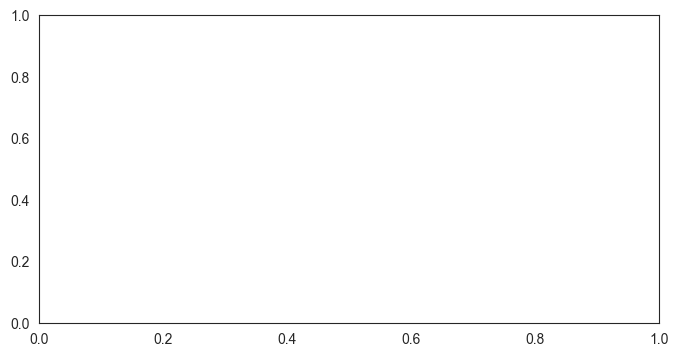

In [112]:
# === PLOT Œµ-PROGRESS BY SCENARIO ===
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(8, 4))
colors = sns.color_palette()
legend_items = []

for (scenario_name, scores), color in zip(convergence_df.groupby("scenario"), colors):
    # Create custom legend item
    legend_items.append((mpl.lines.Line2D([0, 0], [1, 1], c=color), scenario_name))

    # Plot each seed
    for seed, score in scores.groupby("seed"):
        ax.plot(score.nfe, score.epsilon_progress, c=color, lw=1)

ax.set_ylabel(r'$\epsilon$ progress')
ax.set_xlabel('number of function evaluations')

# Add legend
artists, labels = zip(*legend_items)
fig.legend(artists, labels, bbox_to_anchor=(1.02, 0.9))

plt.tight_layout()
plt.savefig("convergence_multi_mordm.png", dpi=300, bbox_inches='tight')
plt.show()

In [113]:
combined_results

0_RfR 0  0_RfR 1  0_RfR 2  1_RfR 0  1_RfR 1  1_RfR 2  2_RfR 0  2_RfR 1  \
0         1        0        0        0        0        0        1        0   
1         0        1        0        1        0        0        0        1   
2         0        0        1        0        0        0        1        0   
3         0        0        0        1        0        0        0        1   
4         0        0        1        0        0        0        0        1   
5         0        0        0        0        1        0        0        0   
6         0        1        0        0        0        0        0        0   
7         0        0        0        1        0        0        0        0   
8         0        0        0        1        0        0        0        0   
9         0        1        0        0        1        0        1        0   
10        0        0        0        0        0        1        0        0   
11        0        0        0        1        0        0        1        0   
12        0        0        0        1        0        0        0        1   
13        0        0        1        0        1        0        0        0   
14        0        0        0        0        0        0        0        1   
15        0        1        0        1        0        0        0        0   
16        1        0        0        0        1        0        1        0   
17        0        0        0        0        1        0        0        1   
18        0        1        0        0        0        1        0        0   
19        0        1        0        0        0        0        0        0   
20        0        0        0        1        0        0        0        0   

    2_RfR 2  3_RfR 0  ...  A.4_DikeIncrease 1  A.4_DikeIncrease 2  \
0         0        0  ...                  10                   3   
1         0        0  ...                   5                   1   
2         0        0  ...                   0                   3   
3         0        0  ...                   3                   5   
4         0        0  ...                   6                   7   
5         1        0  ...                   0                   8   
6         0        1  ...                   3                   3   
7         1        0  ...                   8                   2   
8         0        0  ...                   2                   6   
9         0        0  ...                   0                   4   
10        0        0  ...                   0                   9   
11        0        1  ...                   2                   2   
12        0        0  ...                   9                   5   
13        1        0  ...                   1                   4   
14        0        0  ...                   9                   1   
15        0        0  ...                   6                   8   
16        0        0  ...                   5                   6   
17        0        0  ...                  10                   1   
18        0        1  ...                   5                   4   
19        0        0  ...                   9                   0   
20        0        0  ...                   0                   5   

    A.5_DikeIncrease 0  A.5_DikeIncrease 1  A.5_DikeIncrease 2  \
0                   10                   2                   7   
1                    8                   5                  10   
2                    4                   3                   7   
3                    4                   5                   3   
4                    8                   8                   0   
5                    6                   9                   1   
6                    6                   0                   9   
7                    5                   7                   3   
8                    5                   2                   2   
9                    2                   5                   1   
10                   6                   0

In [114]:
print(combined_results)

    0_RfR 0  0_RfR 1  0_RfR 2  1_RfR 0  1_RfR 1  1_RfR 2  2_RfR 0  2_RfR 1  \
0         1        0        0        0        0        0        1        0   
1         0        1        0        1        0        0        0        1   
2         0        0        1        0        0        0        1        0   
3         0        0        0        1        0        0        0        1   
4         0        0        1        0        0        0        0        1   
5         0        0        0        0        1        0        0        0   
6         0        1        0        0        0        0        0        0   
7         0        0        0        1        0        0        0        0   
8         0        0        0        1        0        0        0        0   
9         0        1        0        0        1        0        1        0   
10        0        0        0        0        0        1        0        0   
11        0        0        0        1        0        0        

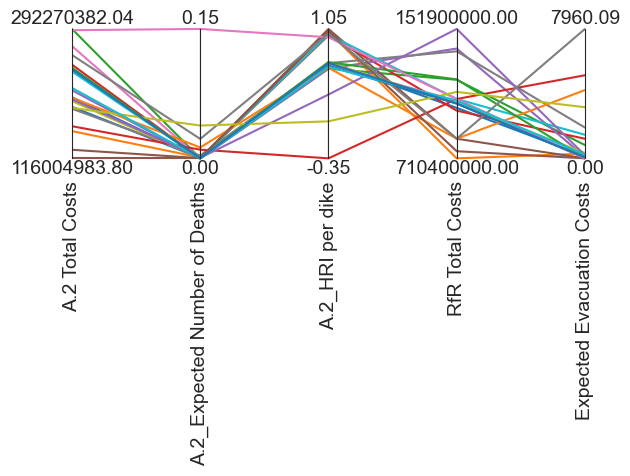

<Figure size 1400x1000 with 0 Axes>

In [115]:
data = combined_results.loc[:, [o.name for o in model.outcomes]]
limits = parcoords.get_limits(data)

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
paraxes.invert_axis("RfR Total Costs")
    # Set larger figure size (wider and taller)
plt.figure(figsize=(14, 10))
plt.savefig("multi mordm all.png", dpi=300, bbox_inches='tight') # width=12 inches, height=8 inches


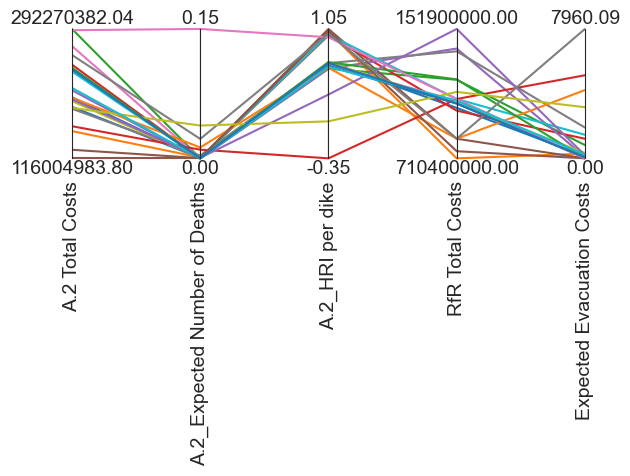

In [116]:

# Generate parallel axes with your limits
paraxes = parcoords.ParallelAxes(limits)

# Plot the data
paraxes.plot(data)

# Invert specific axis
paraxes.invert_axis("RfR Total Costs")

# Save the plot
plt.savefig("mordm_parallel_coordinates.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [126]:



logical = (
    (combined_results["A.2 Total Costs"] < 4e8) &

    (combined_results["A.2_HRI per dike"] > 0.7))



np.sum(logical)
combined_results[logical]

0_RfR 0  0_RfR 1  0_RfR 2  1_RfR 0  1_RfR 1  1_RfR 2  2_RfR 0  2_RfR 1  \
1         0        1        0        1        0        0        0        1   
3         0        0        0        1        0        0        0        1   
5         0        0        0        0        1        0        0        0   
9         0        1        0        0        1        0        1        0   
15        0        1        0        1        0        0        0        0   
16        1        0        0        0        1        0        1        0   
17        0        0        0        0        1        0        0        1   

    2_RfR 2  3_RfR 0  ...  A.4_DikeIncrease 1  A.4_DikeIncrease 2  \
1         0        0  ...                   5                   1   
3         0        0  ...                   3                   5   
5         1        0  ...                   0                   8   
9         0        0  ...                   0                   4   
15        0        0  ...                   6                   8   
16        0        0  ...                   5                   6   
17        0        0  ...                  10                   1   

    A.5_DikeIncrease 0  A.5_DikeIncrease 1  A.5_DikeIncrease 2  \
1                    8                   5                  10   
3                    4                   5                   3   
5                    6                   9                   1   
9                    2                   5                   1   
15                   6                   7                   6   
16                   6                   2                  10   
17                   1                   2                   5   

    A.2 Total Costs  A.2_Expected Number of Deaths  A.2_HRI per dike  \
1      1.530678e+08                       0.000971              1.02   
3      2.436361e+08                       0.000000              0.98   
5      1.160050e+08                       0.000000              1.05   
9      2.343025e+08                       0.000000              0.99   
15     1.276696e+08                       0.000221              1.03   
16     2.905818e+08                       0.151872              0.96   
17     2.567565e+08                       0.022781              1.00   

    RfR Total Costs  Expected Evacuation Costs  
1       710400000.0                 289.683783  
3       504600000.0                1203.918617  
5       625800000.0                   0.000000  
9       454300000.0                1450.398552  
15      679700000.0                   0.000000  
16      454300000.0                   0.000000  
17      625800000.0                7960.092727  

[7 rows x 36 columns]

/var/folders/sp/3r57ckwj0f59wpwykds8r5040000gn/T/ipykernel_28432/2740734344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_2["policy"] = results_2.index  # Automatically uses 16, 17, 18 in your case


<Figure size 1400x1000 with 0 Axes>

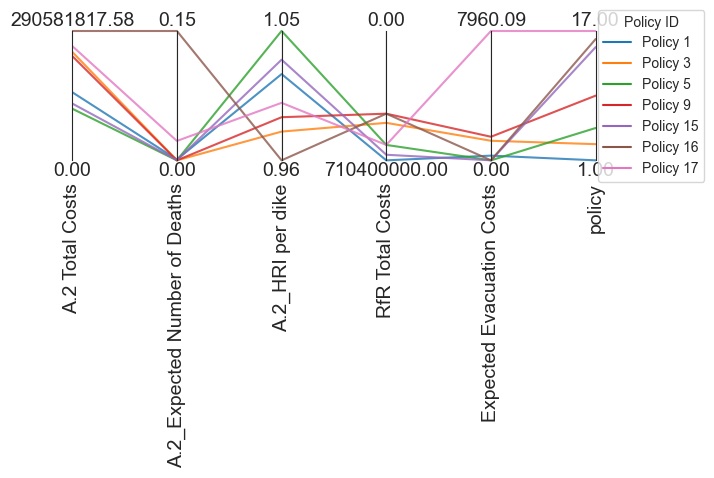

In [123]:

results_2 = combined_results[logical]
results_2["policy"] = results_2.index  # Automatically uses 16, 17, 18 in your case


data = results_2.loc[:, [o.name for o in model.outcomes] + ['policy']]


limits = parcoords.get_limits(data)
limits.loc[0, ['A.2 Total Costs', 'A.2_Expected Number of Deaths',
               'RfR Total Costs', 'Expected Evacuation Costs']] = 0


policy_ids = data["policy"].unique()
colors = sns.color_palette("tab10", len(policy_ids))
color_map = dict(zip(policy_ids, colors))


plt.figure(figsize=(14, 10))
paraxes = parcoords.ParallelAxes(limits)

# Plot each policy row with its assigned color
for _, row in data.iterrows():
    policy_id = row["policy"]
    color = color_map.get(policy_id, "gray")
    paraxes.plot(row.to_frame().T, color=color, alpha=0.8)

# Invert axis if needed
paraxes.invert_axis("RfR Total Costs")


legend_handles = [
    Line2D([0], [0], color=color_map[pid], label=f"Policy {pid}")
    for pid in policy_ids
]
plt.legend(handles=legend_handles, title="Policy ID", loc="center left",bbox_to_anchor=(1.02, 0.5),borderaxespad=0)


plt.savefig("parallel_coords_multi_MORDM_selected_policies.png", dpi=300, bbox_inches='tight')
plt.show()

In [127]:
policies = combined_results[logical]
policies = policies.drop([o.name for o in model.outcomes], axis=1)
policies

0_RfR 0  0_RfR 1  0_RfR 2  1_RfR 0  1_RfR 1  1_RfR 2  2_RfR 0  2_RfR 1  \
1         0        1        0        1        0        0        0        1   
3         0        0        0        1        0        0        0        1   
5         0        0        0        0        1        0        0        0   
9         0        1        0        0        1        0        1        0   
15        0        1        0        1        0        0        0        0   
16        1        0        0        0        1        0        1        0   
17        0        0        0        0        1        0        0        1   

    2_RfR 2  3_RfR 0  ...  A.2_DikeIncrease 2  A.3_DikeIncrease 0  \
1         0        0  ...                   3                   1   
3         0        0  ...                   7                   4   
5         1        0  ...                   0                   3   
9         0        0  ...                   6                   0   
15        0        0  ...                   2                   6   
16        0        0  ...                   9                   5   
17        0        0  ...                   5                   7   

    A.3_DikeIncrease 1  A.3_DikeIncrease 2  A.4_DikeIncrease 0  \
1                   10                   5                   7   
3                    7                   7                   8   
5                    3                   0                   6   
9                    4                   1                  10   
15                   1                   6                   9   
16                   7                   0                   5   
17                   7                   1                   2   

    A.4_DikeIncrease 1  A.4_DikeIncrease 2  A.5_DikeIncrease 0  \
1                    5                   1                   8   
3                    3                   5                   4   
5                    0                   8                   6   
9                    0                   4                   2   
15                   6                   8                   6   
16                   5                   6                   6   
17                  10                   1                   1   

    A.5_DikeIncrease 1  A.5_DikeIncrease 2  
1                    5                  10  
3                    5                   3  
5                    9                   1  
9                    5                   1  
15                   7                   6  
16                   2                  10  
17                   2                   5  

[7 rows x 31 columns]

In [128]:
test=combined_results[logical]
test

0_RfR 0  0_RfR 1  0_RfR 2  1_RfR 0  1_RfR 1  1_RfR 2  2_RfR 0  2_RfR 1  \
1         0        1        0        1        0        0        0        1   
3         0        0        0        1        0        0        0        1   
5         0        0        0        0        1        0        0        0   
9         0        1        0        0        1        0        1        0   
15        0        1        0        1        0        0        0        0   
16        1        0        0        0        1        0        1        0   
17        0        0        0        0        1        0        0        1   

    2_RfR 2  3_RfR 0  ...  A.4_DikeIncrease 1  A.4_DikeIncrease 2  \
1         0        0  ...                   5                   1   
3         0        0  ...                   3                   5   
5         1        0  ...                   0                   8   
9         0        0  ...                   0                   4   
15        0        0  ...                   6                   8   
16        0        0  ...                   5                   6   
17        0        0  ...                  10                   1   

    A.5_DikeIncrease 0  A.5_DikeIncrease 1  A.5_DikeIncrease 2  \
1                    8                   5                  10   
3                    4                   5                   3   
5                    6                   9                   1   
9                    2                   5                   1   
15                   6                   7                   6   
16                   6                   2                  10   
17                   1                   2                   5   

    A.2 Total Costs  A.2_Expected Number of Deaths  A.2_HRI per dike  \
1      1.530678e+08                       0.000971              1.02   
3      2.436361e+08                       0.000000              0.98   
5      1.160050e+08                       0.000000              1.05   
9      2.343025e+08                       0.000000              0.99   
15     1.276696e+08                       0.000221              1.03   
16     2.905818e+08                       0.151872              0.96   
17     2.567565e+08                       0.022781              1.00   

    RfR Total Costs  Expected Evacuation Costs  
1       710400000.0                 289.683783  
3       504600000.0                1203.918617  
5       625800000.0                   0.000000  
9       454300000.0                1450.398552  
15      679700000.0                   0.000000  
16      454300000.0                   0.000000  
17      625800000.0                7960.092727  

[7 rows x 36 columns]

## Hier onder worden de policies gemaakt die getest moeten worden

In [129]:

policies_to_evaluate = []

for i, policy in policies.iterrows():
    policies_to_evaluate.append(Policy(str(i), **policy.to_dict()))

In [131]:
n_scenarios = 10
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies_to_evaluate)

[MainProcess/INFO] pool started with 8 workers
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 70/70 [00:08<00:00,  8.55it/s]
[MainProcess/INFO] terminating pool


In [132]:
results

(    A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
 0                        79  343.657710       1.0   0.938282  158.880077   
 1                       101  129.601343       1.5   0.202839  322.535925   
 2                       116  271.407087      10.0   0.837986   52.172495   
 3                        50   49.493780       1.5   0.317015  279.405042   
 4                        55  193.238573      10.0   0.596106  139.255027   
 ..                      ...         ...       ...        ...         ...   
 65                      125   85.776759      10.0   0.034622  238.178780   
 66                        9  222.983721       1.0   0.749259   77.246903   
 67                       34   96.933233      10.0   0.627239  102.885827   
 68                       90  182.240158       1.5   0.426568  198.799118   
 69                       16  317.233277       1.0   0.145243  309.523412   
 
    A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...  \
 0      

In [133]:
def s_to_n(data, direction):
    mean = np.mean(data)
    std = np.std(data)
    if std==0:
        std = 1

    if direction==ScalarOutcome.MAXIMIZE:
        return mean/std
    else:
        return mean*std


In [134]:
from ema_workbench import ScalarOutcome

experiments, outcomes = results

overall_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}

    logical = experiments['policy']==policy

    for outcome in model.outcomes:
        value  = outcomes[outcome.name][logical]
        sn_ratio = s_to_n(value, outcome.kind)
        scores[outcome.name] = sn_ratio
    overall_scores[policy] = scores
scores = pd.DataFrame.from_dict(overall_scores).T
scores

A.2 Total Costs  A.2_Expected Number of Deaths  A.2_HRI per dike  \
1      8.876214e+15                   1.282413e-05      1.020000e+00   
15     6.635461e+14                   4.659757e-06      4.638708e+15   
16     3.393930e+16                   5.602601e-03      8.646911e+15   
17     2.885196e+16                   1.264690e-04      1.000000e+00   
3      2.269161e+15                   1.976309e-07      8.827055e+15   
5      9.645606e+14                   1.779493e-07      4.728780e+15   
9      7.388300e+14                   3.845838e-08      9.900000e-01   

    RfR Total Costs  Expected Evacuation Costs  
1       710400000.0               1.423382e+07  
15      679700000.0               0.000000e+00  
16      454300000.0               0.000000e+00  
17      625800000.0               2.446625e+07  
3       504600000.0               3.142528e+07  
5       625800000.0               4.678443e+06  
9       454300000.0               3.541019e+07

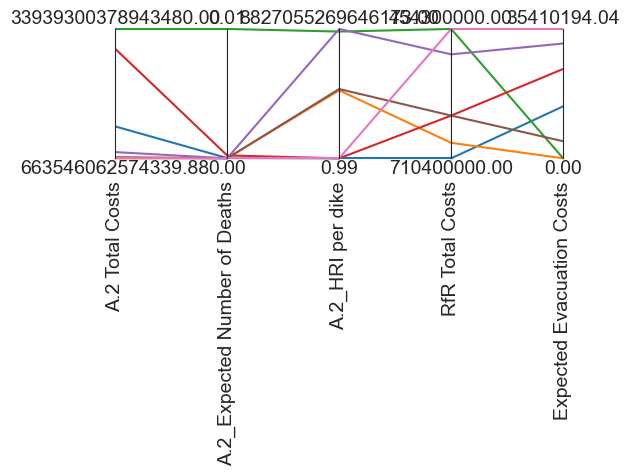

In [135]:
data = scores
limits = parcoords.get_limits(data)


paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
paraxes.invert_axis("RfR Total Costs")

plt.show()

In [136]:
experiments, outcomes = results

overall_regret = {}
max_regret = {}
for outcome in model.outcomes:
    policy_column = experiments['policy']

    # create a DataFrame with all the relevent information
    # i.e., policy, scenario_id, and scores
    data = pd.DataFrame({outcome.name: outcomes[outcome.name],
                         "policy":experiments['policy'],
                         "scenario":experiments['scenario']})

    # reorient the data by indexing with policy and scenario id
    data = data.pivot(index='scenario', columns='policy')

    # flatten the resulting hierarchical index resulting from
    # pivoting, (might be a nicer solution possible)
    data.columns = data.columns.get_level_values(1)

    # we need to control the broadcasting.
    # max returns a 1d vector across scenario id. By passing
    # np.newaxis we ensure that the shape is the same as the data
    # next we take the absolute value
    #
    # basically we take the difference of the maximum across
    # the row and the actual values in the row
    #
    outcome_regret = (data.max(axis=1).values[:, np.newaxis] - data).abs()

    overall_regret[outcome.name] = outcome_regret
    max_regret[outcome.name] = outcome_regret.max()

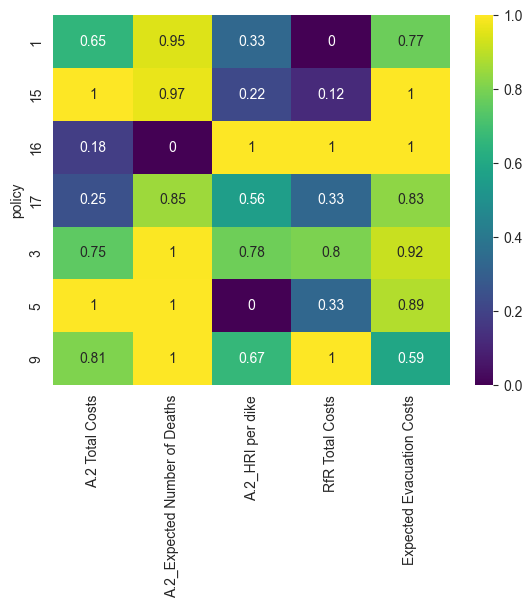

In [137]:
max_regret = pd.DataFrame(max_regret)
sns.heatmap(max_regret/max_regret.max(), cmap='viridis', annot=True)
plt.savefig("regret multi mordm.png", dpi=300, bbox_inches='tight')
plt.show()

In [138]:
experiments

A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                        79  343.657710       1.0   0.938282  158.880077   
1                       101  129.601343       1.5   0.202839  322.535925   
2                       116  271.407087      10.0   0.837986   52.172495   
3                        50   49.493780       1.5   0.317015  279.405042   
4                        55  193.238573      10.0   0.596106  139.255027   
..                      ...         ...       ...        ...         ...   
65                      125   85.776759      10.0   0.034622  238.178780   
66                        9  222.983721       1.0   0.749259   77.246903   
67                       34   96.933233      10.0   0.627239  102.885827   
68                       90  182.240158       1.5   0.426568  198.799118   
69                       16  317.233277       1.0   0.145243  309.523412   

   A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...  \
0        1.0   0.988773   66.783487       1.0   0.454182  ...   
1        1.0   0.208350  108.090782       1.5   0.667527  ...   
2       10.0   0.025820  316.737108      10.0   0.320408  ...   
3       10.0   0.166882  187.585053      10.0   0.057778  ...   
4       10.0   0.802356   36.189217       1.5   0.232832  ...   
..       ...        ...         ...       ...        ...  ...   
65       1.5   0.348930  324.601259       1.0   0.181896  ...   
66       1.5   0.659890  263.281058       1.5   0.859353  ...   
67       1.0   0.522169  246.037672      10.0   0.544759  ...   
68       1.0   0.463015  201.408405       1.0   0.705489  ...   
69      10.0   0.748057  142.293717       1.5   0.961329  ...   

    A.3_DikeIncrease 2 A.4_DikeIncrease 0  A.4_DikeIncrease 1  \
0                    5                  7                   5   
1                    5                  7                   5   
2                    5                  7                   5   
3                    5                  7                   5   
4                    5                  7                   5   
..                 ...                ...                 ...   
65                   1                  2                  10   
66                   1                  2                  10   
67                   1                  2                  10   
68                   1                  2                  10   
69                   1                  2                  10   

    A.4_DikeIncrease 2 A.5_DikeIncrease 0  A.5_DikeIncrease 1  \
0                    1                  8                   5   
1                    1                  8                   5   
2                    1                  8                   5   
3                    1                  8                   5   
4                    1                  8                   5   
..                 ...                ...                 ...   
65                   1                  1                   2   
66                   1                  1                   2   
67                   1                  1                   2   
68                   1                  1                   2   
69                   1                  1                   2   

   A.5_DikeIncrease 2 scenario policy     model  
0                  10     3030      1  dikesnet  
1                  10     3031      1  dikesnet  
2                  10     3032      1  dikesnet  
3                  10     3033      1  dikesnet  
4                  10     3034      1  dikesnet  
..                ...      ...    ...       ...  
65                  5     3035     17  dikesnet  
66                  5     3036     17  dikesnet  
67                  5     3037     17  dikesnet  
68                  5     3038     17  dikesnet  
69                  5     3039     17  dikesnet  

[70 rows x 53 columns]

In [139]:
policies

0_RfR 0  0_RfR 1  0_RfR 2  1_RfR 0  1_RfR 1  1_RfR 2  2_RfR 0  2_RfR 1  \
1         0        1        0        1        0        0        0        1   
3         0        0        0        1        0        0        0        1   
5         0        0        0        0        1        0        0        0   
9         0        1        0        0        1        0        1        0   
15        0        1        0        1        0        0        0        0   
16        1        0        0        0        1        0        1        0   
17        0        0        0        0        1        0        0        1   

    2_RfR 2  3_RfR 0  ...  A.2_DikeIncrease 2  A.3_DikeIncrease 0  \
1         0        0  ...                   3                   1   
3         0        0  ...                   7                   4   
5         1        0  ...                   0                   3   
9         0        0  ...                   6                   0   
15        0        0  ...                   2                   6   
16        0        0  ...                   9                   5   
17        0        0  ...                   5                   7   

    A.3_DikeIncrease 1  A.3_DikeIncrease 2  A.4_DikeIncrease 0  \
1                   10                   5                   7   
3                    7                   7                   8   
5                    3                   0                   6   
9                    4                   1                  10   
15                   1                   6                   9   
16                   7                   0                   5   
17                   7                   1                   2   

    A.4_DikeIncrease 1  A.4_DikeIncrease 2  A.5_DikeIncrease 0  \
1                    5                   1                   8   
3                    3                   5                   4   
5                    0                   8                   6   
9                    0                   4                   2   
15                   6                   8                   6   
16                   5                   6                   6   
17                  10                   1                   1   

    A.5_DikeIncrease 1  A.5_DikeIncrease 2  
1                    5                  10  
3                    5                   3  
5                    9                   1  
9                    5                   1  
15                   7                   6  
16                   2                  10  
17                   2                   5  

[7 rows x 31 columns]

In [140]:
policies.to_csv("multi-scenario_policies.csv", index=True)


## PRIM analyse met multi scenario policies voor robustness

In [141]:
# lees de CSV in met de gevonden policies vanuit de MORDM
policies_multiscenario = pd.read_csv("multi-scenario_policies.csv")

# zet elke rij om in een Policy-object
multiscenario_policies = [
    Policy(f"cand_{i}", **row.to_dict())
    for i, row in policies_multiscenario.iterrows()

    ]


In [143]:
if __name__ == "__main__":
    model, _ = get_model_for_problem_formulation(3)

    df_pols = pd.read_csv("multi-scenario_policies.csv")

    # policies = [
    #     Policy(f"policy_{i}", **row.to_dict())
    #     for i, row in df_pols.iterrows()
    # ]

    scenarios=10
    policies=multiscenario_policies #policies retrieved from multi scenario MORDM
    with MultiprocessingEvaluator(model, n_processes=-1) as evaluator:
        results = evaluator.perform_experiments(scenarios=scenarios, policies=policies )

        experiments, outcomes = results

[MainProcess/INFO] pool started with 7 workers
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 70/70 [00:08<00:00,  8.12it/s]
[MainProcess/INFO] terminating pool


In [144]:
experiments

A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                        98   89.014900      10.0   0.786512  277.682293   
1                        42  118.553976       1.0   0.883325  158.823091   
2                        68  287.732755      10.0   0.055628  249.145182   
3                         5  149.030745       1.5   0.679500  306.923412   
4                       111  204.704916       1.5   0.261176  213.290223   
..                      ...         ...       ...        ...         ...   
65                       35   36.004841      10.0   0.360914  332.939427   
66                       86  189.148868       1.0   0.918794   44.372367   
67                       61  329.645248       1.5   0.497186  148.842055   
68                       17  257.284463      10.0   0.197408   85.241416   
69                      132  223.592680       1.0   0.549268  100.096597   

   A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...  \
0       10.0   0.604287   79.110852       1.0   0.015524  ...   
1        1.5   0.511360  253.363231      10.0   0.958893  ...   
2        1.5   0.749088  158.321670       1.5   0.740757  ...   
3       10.0   0.375682  151.111487      10.0   0.600381  ...   
4        1.5   0.941906  215.198299       1.5   0.521277  ...   
..       ...        ...         ...       ...        ...  ...   
65       1.0   0.181572   56.709185       1.0   0.346034  ...   
66       1.0   0.805419  285.560102      10.0   0.493775  ...   
67       1.0   0.488537  115.958274       1.5   0.157070  ...   
68      10.0   0.020787  291.879627       1.5   0.270961  ...   
69       1.5   0.226461  323.054102       1.0   0.876781  ...   

    A.3_DikeIncrease 2 A.4_DikeIncrease 0  A.4_DikeIncrease 1  \
0                    5                  7                   5   
1                    5                  7                   5   
2                    5                  7                   5   
3                    5                  7                   5   
4                    5                  7                   5   
..                 ...                ...                 ...   
65                   1                  2                  10   
66                   1                  2                  10   
67                   1                  2                  10   
68                   1                  2                  10   
69                   1                  2                  10   

    A.4_DikeIncrease 2 A.5_DikeIncrease 0  A.5_DikeIncrease 1  \
0                    1                  8                   5   
1                    1                  8                   5   
2                    1                  8                   5   
3                    1                  8                   5   
4                    1                  8                   5   
..                 ...                ...                 ...   
65                   1                  1                   2   
66                   1                  1                   2   
67                   1                  1                   2   
68                   1                  1                   2   
69                   1                  1                   2   

   A.5_DikeIncrease 2 scenario  policy     model  
0                  10     3040  cand_0  dikesnet  
1                  10     3041  cand_0  dikesnet  
2                  10     3042  cand_0  dikesnet  
3                  10     3043  cand_0  dikesnet  
4                  10     3044  cand_0  dikesnet  
..                ...      ...     ...       ...  
65                  5     3045  cand_6  dikesnet  
66                  5     3046  cand_6  dikesnet  
67                  5     3047  cand_6  dikesnet  
68                  5     3048  cand_6  dikesnet  
69                  5     3049  cand_6  dikesnet  

[70 rows x 53 columns]

In [145]:
results_per_policy = {}

hri_baseline=baseline_outcomes["A.2_HRI per dike"]
hri_sys = outcomes["A.2_HRI per dike"]
hri_q25 = np.percentile(hri_baseline, 25)# (N,) systeembreed
target_hri = hri_sys <= hri_q25

        # ---- 2.2 Expected Annual Damage ----
cost_baseline=baseline_outcomes["A.2 Total Costs"]
cost_total = outcomes["A.2 Total Costs"] # (N,)
cost_q75 = np.percentile(cost_baseline, 75)
target_cost = cost_total >= cost_q75

        # # ---- 2.3 RfR Total Costs ----
        # rfr_costs = outcomes["RfR Total Costs"].sum(axis=1)  # (N,)
        # rfr_q75 = np.percentile(rfr_costs, 75)
        # target_rfr = rfr_costs >= rfr_q75

        # ---- 2.4 Combineer tot √©√©n worst-case target ----
y = target_hri | target_cost
y


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False,  True,  True])

In [146]:
for pol in multiscenario_policies:

    pol_name = pol.name

    # selecteer alleen de runs met exact die naam
    mask_pol = experiments["policy"] == pol_name
    X_pol   = experiments.loc[mask_pol, [u.name for u in model.uncertainties]]
    y_pol   = y[mask_pol]

    # 3) sanity‚Äêchecks
    # 3) sanity‚Äêchecks
    print(f"Policy {pol.name!r}: {len(X_pol)} runs (y=True: {y_pol.sum()}, y=False: {len(y_pol)-y_pol.sum()})")

    if len(X_pol) == 0:
        print("  ‚Üí geen runs met deze policy, overslaan")
        continue

    if not (y_pol.dtype == bool):
        y_pol = y_pol.astype(bool)

    if y_pol.sum() == 0 or y_pol.sum() == len(y_pol):
        print("  ‚Üí y bevat niet zowel True als False, overslaan")
        continue

    # 2) maak en run PRIM
    prim_alg = prim.Prim(
        X_pol,
        y_pol,
        threshold=0.6,       # kies zelf je cover‚Äêof‚Äêdensity cut‚Äêoff
        peel_alpha=0.05,     # hoe ‚Äúagressief‚Äù peel je
        mass_min=0.1        # minimale fractie runs in box
    )
    box = prim_alg.find_box()

    box.inspect()
    #box.show_tradeoff()

    traj = box.peeling_trajectory


    # 3) bewaar je result voor latere vergelijking
    results_per_policy[pol_name] = {
        "prim_alg":   prim_alg,
        "selected_box": box,
        "trajectory":   traj,
    }
        # "box_id": int(traj.score.idxmax())

[MainProcess/INFO] 10 points remaining, containing 1 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.1, coverage: 1.0, density: 1.0 restricted_dimensions: 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{10.0}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{10.0}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]
[MainProcess/INFO] 10 points 

Policy 'cand_0': 10 runs (y=True: 10, y=False: 0)
  ‚Üí y bevat niet zowel True als False, overslaan
Policy 'cand_1': 10 runs (y=True: 10, y=False: 0)
  ‚Üí y bevat niet zowel True als False, overslaan
Policy 'cand_2': 10 runs (y=True: 1, y=False: 9)
coverage    1.0
density     1.0
id          3.0
k           1.0
mass        0.1
mean        1.0
n           1.0
res_dim     2.0
Name: 3, dtype: float64

                           box 3                                    
                             min              max  qp value qp value
A.2_Brate                 {10.0}           {10.0}  0.125000      NaN
discount rate 0  {1.5, 3.5, 4.5}  {1.5, 3.5, 4.5}  0.333333      NaN

Policy 'cand_3': 10 runs (y=True: 10, y=False: 0)
  ‚Üí y bevat niet zowel True als False, overslaan
Policy 'cand_4': 10 runs (y=True: 1, y=False: 9)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{10.0}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{10.0}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]
[MainProcess/INFO] 10 points remaining, containing 3 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.3, coverage: 1.0, density: 1.0 restricted_dimensions: 2


coverage    1.0
density     1.0
id          3.0
k           1.0
mass        0.1
mean        1.0
n           1.0
res_dim     2.0
Name: 3, dtype: float64

                           box 3                                    
                             min              max  qp value qp value
A.2_Brate                 {10.0}           {10.0}  0.125000      NaN
discount rate 0  {1.5, 3.5, 4.5}  {1.5, 3.5, 4.5}  0.333333      NaN

Policy 'cand_5': 10 runs (y=True: 10, y=False: 0)
  ‚Üí y bevat niet zowel True als False, overslaan
Policy 'cand_6': 10 runs (y=True: 3, y=False: 7)
coverage    1.0
density     1.0
id          3.0
k           3.0
mass        0.3
mean        1.0
n           3.0
res_dim     2.0
Name: 3, dtype: float64

                       box 3                                
                         min          max  qp value qp value
discount rate 0   {1.5, 3.5}   {1.5, 3.5}  0.078717      NaN
A.4_Brate        {10.0, 1.5}  {10.0, 1.5}  0.216000      NaN



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{1.5, 3.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '{1.5, 3.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]


In [147]:
# 1) lijst van alle uncertainty-kolommen
cols_unc = [u.name for u in model.uncertainties]

# 2) per kolom zelf min/max bepalen, alleen als 'ie numeriek is
global_ranges = {}
for var in cols_unc:
    ser = experiments[var]
    if is_numeric_dtype(ser):
        lo = ser.min()
        hi = ser.max()
        global_ranges[var] = (lo, hi)
    else:
        # categoricals slaan we over, of bewaar je volledige domain als set:
        cats = ser.cat.categories if hasattr(ser.dtype, "categories") else None
        print(f"  ‚Üí sla {var!r} over (dtype={ser.dtype})")

# 3) print ter controle
for var, (lo, hi) in global_ranges.items():
    print(f"{var:30s}  glob_min = {lo:8.3f},  glob_max = {hi:8.3f}")

  ‚Üí sla 'discount rate 0' over (dtype=category)
  ‚Üí sla 'discount rate 1' over (dtype=category)
  ‚Üí sla 'discount rate 2' over (dtype=category)
  ‚Üí sla 'A.1_Brate' over (dtype=category)
  ‚Üí sla 'A.2_Brate' over (dtype=category)
  ‚Üí sla 'A.3_Brate' over (dtype=category)
  ‚Üí sla 'A.4_Brate' over (dtype=category)
  ‚Üí sla 'A.5_Brate' over (dtype=category)
A.0_ID flood wave shape         glob_min =    5.000,  glob_max =  132.000
A.1_Bmax                        glob_min =   36.005,  glob_max =  329.645
A.1_pfail                       glob_min =    0.056,  glob_max =    0.919
A.2_Bmax                        glob_min =   44.372,  glob_max =  332.939
A.2_pfail                       glob_min =    0.021,  glob_max =    0.942
A.3_Bmax                        glob_min =   56.709,  glob_max =  323.054
A.3_pfail                       glob_min =    0.016,  glob_max =    0.959
A.4_Bmax                        glob_min =   46.626,  glob_max =  340.321
A.4_pfail                       glob_m

In [148]:
overall = (
    experiments
      .groupby("policy")
      .apply(lambda df: y[df.index].mean())
      .rename("overall_fail_rate")
)

# --- 2) verzamel PRIM‚Äêmetrics uit de geselecteerde box voor elke policy ---
box_info = []
for pol, info in results_per_policy.items():
    box = info["selected_box"]   # dit is een PrimBox
    box_info.append({
        "policy":   pol,
        "coverage": box.coverage,
        "density":  box.density,
        "res_dim":  box.res_dim,
        "mass":     box.mass
    })

box_df = pd.DataFrame(box_info).set_index("policy")

# --- 3) combineer alles in √©√©n rapport-DataFrame ---
report = pd.concat([overall, box_df], axis=1)

# zet de fracties om in percentages
report["overall_fail_%"]       = report.overall_fail_rate * 100
report["box_covers_%"]         = report.coverage        * 100
report["fail_in_box_%"]        = report.density         * 100

# selecteer en sorteer kolommen
report = report[[
    "overall_fail_%",
    "box_covers_%",
    "fail_in_box_%",
    "res_dim",
    "mass"
]].sort_values("overall_fail_%", ascending=False)

# afronden op 1 decimaal
report = report.round(1)

report

/var/folders/sp/3r57ckwj0f59wpwykds8r5040000gn/T/ipykernel_28432/3877888085.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("policy")
/var/folders/sp/3r57ckwj0f59wpwykds8r5040000gn/T/ipykernel_28432/3877888085.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: y[df.index].mean())


overall_fail_%  box_covers_%  fail_in_box_%  res_dim  mass
policy                                                            
cand_0           100.0           NaN            NaN      NaN   NaN
cand_1           100.0           NaN            NaN      NaN   NaN
cand_3           100.0           NaN            NaN      NaN   NaN
cand_5           100.0           NaN            NaN      NaN   NaN
cand_6            30.0         100.0          100.0      2.0   0.3
cand_2            10.0         100.0          100.0      2.0   0.1
cand_4            10.0         100.0          100.0      2.0   0.1